In [ ]:
# Problem Statement: How does urbanization affect the infection rate of a given population with TB
#on the rate of TB infection  --> Beta is infection. // 90 days 
# Metric total amount of people infected
# More dense pop has higher Beta, and lower dense pop has lower Beta

In [ ]:
#Use Tuberculosis - Mexico, Colombia

#Expectation: We expect that the percentage of infection will be less as we increase the number of medical center 
# Questions
# 1. Medical center per capita?
# 2. Which countries are we focused on?
     # - Columbia (Population: 48,653,000)
     # - Mexico  (Population: 129,200,000)
# Beta - 14 Mexico within 3 days 
# Beta - 10 Colombia within 4 days

# Update function 
#    - Variable that will change our Beta (Randomize number with a floor value) 
# Contact rate is varied. 
# 15 days is our Gamma (FIXED - perccentage of population 10-15)

# Expectation
#   - infection total will be higher in Mexico because it is more densely populated.

# val = list(linspace(1, 91, 90))



In [75]:
!pip install pint

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import random

In [76]:
def make_system(beta, gamma,b1, g1):
# b1 city infection rate g1 city recovery rate. 
# Say we have two population with the same # of people
# however lets say one population is densely populated like in a city
# lets say their SIR model is repersenated as S_C, I_C , R_C
# we assume the infection rate(b1) & recovery rate (g1) is greater in the city  # g1 city recovery rate
    init = State(S=129200, I=100, R=0,
                S_C = 48653, I_C = 100, R_C=0)
    init /= sum(init.S + init.I +init.R)
    t0 = 0
    t_end = 100

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, b1 = b1, g1 = g1 )

In [109]:
def update_func(state, t, system):
        
    s = state.S
    i = state.I
    r = state.R

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    # At every tenth day the infected population gets doubled
    if(t % 10 == 0):
        infected *= 2
        
    s -= infected
    i += infected - recovered
    r += recovered
    
    
    # 2nd population 
    s1 = state.S_C
    i1 = state.I_C
    r1 = state.R_C
    
    infected1 = system.b1 * i1 * s1   
    recovered1 = system.g1 * i1
    
    if(t % 10 == 0):
        infected1 *= 2

    
    s1 -= infected1
    i1 += infected1 - recovered1
    r1 += recovered1
    
    
    return State(S=s, I=i, R=r, S_C= s1, I_C= i1, R_C=r1)

In [110]:
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [111]:
def plot_results(S, I, R):
    
    """Plot the results of a SIR model.
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', label='S')
    plot(I, '--', label='I')
    plot(R, '--', label='R')
#     plot(S_C, ':', label='S_C')
#     plot(I_C, ':', label='I_C')
#     plot(R_C, ':', label='R_C')
    # Try to plot on two graphs
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [112]:
# beta = 1/4, gamma = 1/5,b1 = 1/2, g1 = 1/3
sys = make_system(.25, .15, .20, .15)
results= run_simulation(sys, update_func)
results

,S,I,R,S_C,I_C,R_C
0,0.999227,0.000773,0.000000,0.376280,7.733952e-04,0.000000
1,0.998840,0.001044,0.000116,0.376164,7.737912e-04,0.000116
2,0.998580,0.001148,0.000273,0.376105,7.159369e-04,0.000232
3,0.998293,0.001262,0.000445,0.376051,6.623999e-04,0.000339
4,0.997978,0.001388,0.000634,0.376002,6.128592e-04,0.000439
5,0.997632,0.001526,0.000842,0.375956,5.670176e-04,0.000531
6,0.997251,0.001678,0.001071,0.375913,5.245996e-04,0.000616
7,0.996833,0.001844,0.001323,0.375874,4.853504e-04,0.000694
8,0.996373,0.002027,0.001599,0.375837,4.490339e-04,0.000767
9,0.995868,0.002228,0.001904,0.375803,4.154316e-04,0.000835


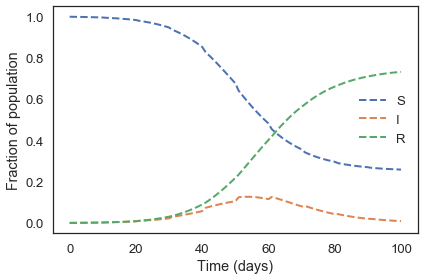

In [113]:
plot_results(results.S, results.I, results.R)

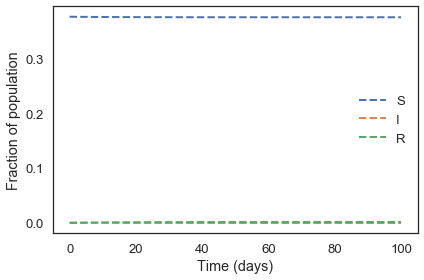

In [114]:
plot_results(results.S_C, results.I_C, results.R_C)